In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Applied Math 10: Computing for Science and Engineering

## Lab 9 : Advanced - Random Numbers

**Spring 2020**

### Learning Goals of Lab 

- Random numbers (generation and use), Monte Carlo integration, and one-dimensional random walks.

### 1 Random Numbers with Different Distributions

As you have learned from lecture, we can generate pseudorandom numbers in the range $[0, 1)$ to cover any other range uniformly. Here, we will look at how we can transform a uniform distribution of random numbers into other types of distributions. For many applications one requires random numbers with a particular distribution. For example, in order to simulate Brownian motion, i.e., the random motions of microscopic particles in viscous fluids, one requires normally distributed random numbers. 

### 1.1 Scale and Shift

To scale and shift uniformly distributed random numbers $u$ in the range $[0, 1)$ all we need to do the following transformation.
\begin{equation}
x_r = a + u(b-a),
\end{equation}
where $x_r$ are the scaled and shifted random numbers, and $a$, $b$ is the new range.

### Exercise 1 
Using the above expression scale a sequence of 1000 random numbers generated using the function `np.random.rand` to the range $[10, 20)$. Plot the resulting numbers.

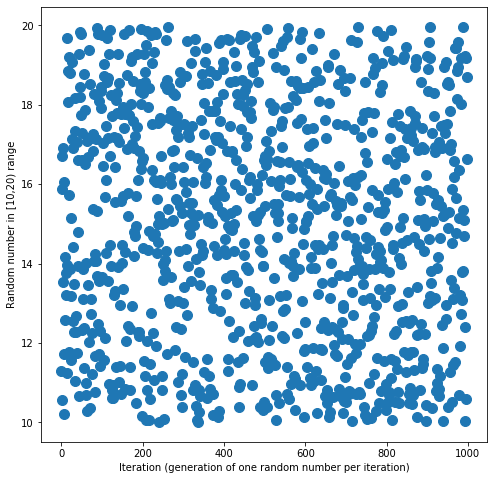

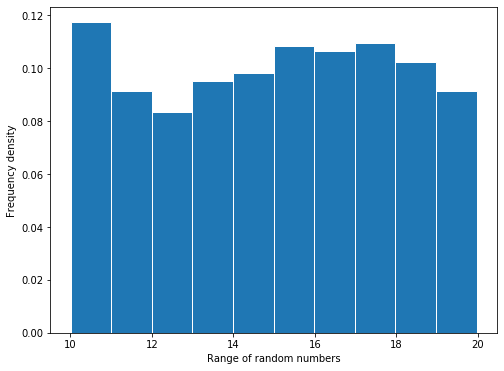

In [3]:
# generate N random numbers (uniform distribution) in range [0, 1), placing them in array u

'''Fill in the value of N and the code for u'''
      #---------------------------------------------
N = 1000 
u = np.random.rand(N)
      #----------------------------------------------
    
# the bounds [a,b) of the new range
'''Fill in the value of N and the code for u'''
      #---------------------------------------------
a = 10
b = 20
      #----------------------------------------------

# scale and shift to generate xr (the array holding the random numbers in the range )
'''Fill in the code for xr'''
      #---------------------------------------------
xr = a + u * (b-a)
      #----------------------------------------------

    
# plot the numbers
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(xr[0:-1], 'o', markersize=10)
plt.xlabel('Iteration (generation of one random number per iteration)')
plt.ylabel('Random number in [10,20) range')
plt.show()

# plot histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(xr, bins=10, density=True, edgecolor='w')
plt.xlabel('Range of random numbers')
plt.ylabel('Frequency density')
plt.show()

### 1.2 Exponential distribution
To generate exponentially distributed random numbers using $u$, the following transformation can be used.

\begin{equation}
x_r = -\ln{u}/\lambda,
\end{equation}
where $x_r$ is a random number with the exponential distribution and $\lambda$ is a constant that scales the exponential.

### Example
Using the above expression transform a sequence of 500 random numbers generated using the function `np.random.rand` to an exponential distribution with $\lambda=10$. Plot a histogram of the resulting sequence with 20 bins. Use the keyword `density=True` to normalize the counts. On the same plot also add a line representing the following equation. $y(x) = 10e^{-10x}$.

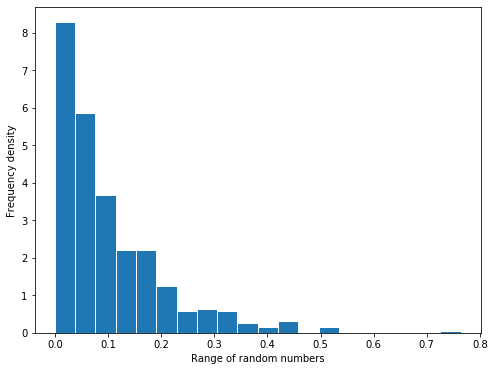

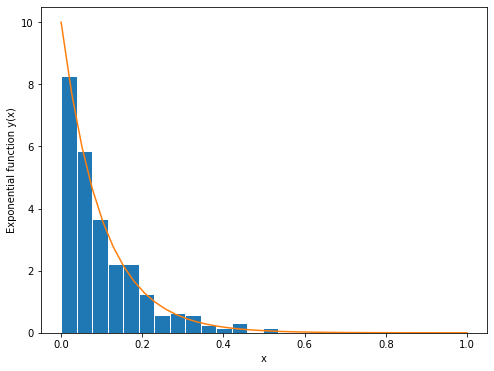

In [4]:
# Assign values to the constants
lambda_exp = 10
N = 500

# Generate u
u = np.random.rand(N)

# remove any zeros from the 
num_zeros = len(u) - np.count_nonzero(u)
u[u == 0.0] = np.random.rand(num_zeros)
xr = -np.log(u) / lambda_exp # exp(lambda * x_r) = u

# plot histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(xr, bins=20, density=True, edgecolor='w')
plt.xlabel('Range of random numbers')
plt.ylabel('Frequency density')
plt.show()

# add line plot of distribution to histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(xr, bins=20, density=True, edgecolor='w')
x = np.linspace(0, 1, 40)
y = lambda_exp * np.exp(-lambda_exp * x)
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('Exponential function y(x)')
plt.show()

### 1.3 Normal distribution

Random numbers with a normal distribution are very useful in many kinds of Monte Carlo simulation. One way to generate normally distributed random numbers is by using the Box-Muller method, which arises from a polar transformation. It is given by the following transformation equations.

\begin{equation}
x_1 = \sqrt{-2\ln(u_1)}\cos{2\pi u_2} \\
x_2 = \sqrt{-2\ln(u_1)}\sin{2\pi u_2},
\end{equation}
where $u_1$ and $u_2$ are independent uniform random variables and $x_1$ and $x_2$ are the transformed independent standard normal random variables.

Note that in the `numpy` library there are built-in functions to generate random numbers with many different distributions. 

To generate random numbers from a normal distribution (that is, a Gaussian distribution with 0 mean and 1 variance), call 
`np.random.randn()`

### Exercise 2
Generate a sequence of 1000 random numbers using the function `np.random.randn()`. Plot the resulting numbers.

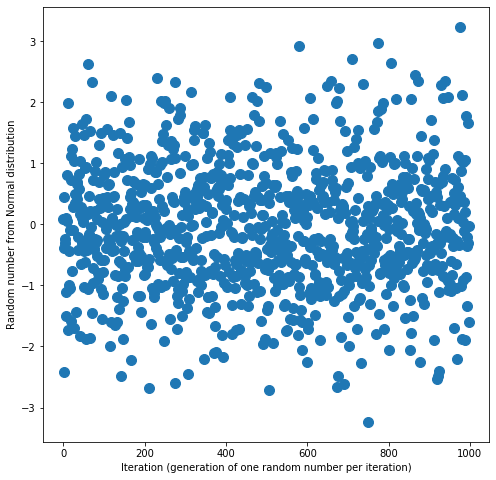

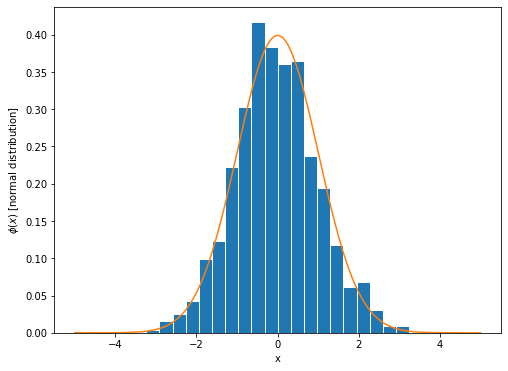

In [7]:
N = 1000
'''Fill in the code for generating random numbers having a normal distribution'''
    #---------------------------------------------
u = np.random.randn(N)
    #----------------------------------------------

# plot 
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(u[0:-1], 'o', markersize=10)
plt.xlabel('Iteration (generation of one random number per iteration)')
plt.ylabel('Random number from Normal distribution')
plt.show()

# plot histogram
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(u, bins=20, density=True, edgecolor='w')

# add line plot of normal distribution to histogram
x = np.linspace(-5, 5, 1000)
mu=0.
sigma=1.
y = (1./np.sqrt(2.*np.pi*sigma*sigma)) * np.exp(- (x-mu)**2/(2.*sigma**2))
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('$\phi (x)$ [normal distribution]')
plt.show()

___________________________________________________________________________________________________________________________

### 2 Monte Carlo Integration 

Say we want to integrate a function $f(x)$ in the interval $a, b$. Then, an approximation of the integral can be found by averaging samples of $f(x)$ at uniform random points in the interval. 

So, putting this into mathematical form, if $F$ is the integral of the function $f(x)$ over the interval $(a, b)$. Then using the Monte Carlo integration method we can estimate $F$ as follows.
\begin{equation}
F = \frac{b-a}{N-1}\sum_{i=0}^N f(x_i), \ \ \ \ \  Eq.(1)
\end{equation}
where, $x_i$ is a sampled from a uniform distribution in the interval $(a, b)$ and $N$ is the total number samples of $x$. Intuitively, this can be thought of as evaluating the mean of the function $f(x)$ over the interval $(a, b)$ and multiplying by the length of the interval, i.e., $(b-a)$.

### Exercise 3
Complete the code below to create a function that implements the Monte Carlo method for integration as described above. The inputs to the function should be 
1. A python function that describes the mathematical function to be integrated.
2. The number of random samples to use for Monte Carlo.
3. The minimum and the maximum of the range over which the integral needs to be evaluated.

In [8]:
def MC_integrate(func, num_points, a, b):
#   inputs:
#   func: function to be evaluated
#   num_points: number of random samples to draw for Monte Carlo
#   a: minimum of the range in which the integral needs to be evaluated
#   b: maximum of the range in which the integral needs to be evaluated
    sum = 0.
    for i in range(num_points):
        # Fill in the code for generating random numbers in the range [a,b], 
        # and for calculating the sum in Eq. (1)
      #---------------------------------------------
        x = a + np.random.rand() * (b-a)
        sum = sum + func(x)
      #----------------------------------------------

    mc_int = (b - a) * sum / (num_points - 1)    # this line calculates F (as seen in Eq. (1))
    
    return mc_int

__________________________________________________________________________________________________________________________

### Problem 1
Evaluate the integral of the function $f(x) = \sqrt{x}$ from $x=1$ to $x=4$ using function `MC_integrate` created in the previous exercise for

(a) $N =1000$ 

(b) $N= 1000, 10000, 100000, 1000000$. 

Print the value of the estimated integral for each value of $N$ and the absolute difference between the exact result.

In [9]:
# Define function 
def fofx(x):
    '''Fill in the code for the function f(x) [the integrand]'''
      #---------------------------------------------
    func = np.sqrt(x)
      #----------------------------------------------
    return func

# Assign values to the bounds of the range [a,b]
    '''Assign values for the bounds of the range '''
      #---------------------------------------------
b = 4 # upper bound
a = 1 # lower bound
      #---------------------------------------------- 


In [10]:
# For Part (a)

# Assign value to N
'''Assign value to N '''
      #----------------------------------------------
N = 1000
      #----------------------------------------------
    

'''Fill in code for F (call MC_integrate)'''
      #----------------------------------------------
F = MC_integrate(fofx, N, a, b)
      #----------------------------------------------

# print MC result and difference from exact result
iexact = 4.66666

print(F, F - iexact)


4.732432736912654 0.0657727369126535


In [12]:
# For Part (b)
    
# Assign values to N
N = [1000, 10000, 100000, 1000000]

# Initilize F (it will be calculate for different N values)
F = np.zeros(len(N)) 

# loop for calling MC_integrate
for n in range(len(N)):
    
    # Fill in code for F[n] 
      #---------------------------------------------
    F[n] = MC_integrate(fofx, N[n], a, b)
      #----------------------------------------------

# print MC result and difference from exact result

for n in range(len(N)):
    print(F[n], F[n] - iexact)

4.649333433370116 -0.017326566629884077
4.66334629587979 -0.003313704120210481
4.666683662964884 2.3662964883541804e-05
4.665128937852794 -0.0015310621472064412


### Problem 2
Using the function `MC_integrate` evaluate the numerical integral of the following function from 0 to $\pi$.
\begin{equation}
g(x) = \frac{\sin{x}}{\sqrt{x^2+1}}
\end{equation}

In [23]:
#  your code here
def gofx(x):
    '''Fill in the code for the function f(x) [the integrand]'''
      #---------------------------------------------
    func = np.sin(x) / np.sqrt((x**2) + 1)
      #----------------------------------------------
    return func


# Assign values to the bounds of the range [a,b]
    '''Assign values for the bounds of the range '''
      #---------------------------------------------
b = np.pi # upper bound
a = 0 # lower bound
      #---------------------------------------------- 

In [24]:
# Assign value to N
'''Assign value to N '''
      #----------------------------------------------
N = 1000
      #----------------------------------------------
    

'''Fill in code for F (call MC_integrate)'''
      #----------------------------------------------
G = MC_integrate(gofx, N, a, b)
      #----------------------------------------------
print('Numerical value of definite integral for N = 1000:', G)

Numerical value of definite integral for N = 1000: 1.1360798573126247


### Problem 3

In this problem, you will implement an 1-dimensional random walk in which the random steps are sampled from a normal distribution under two conditions:

(a) Consider a (not so drunk) drunken sailor, who is sober enough to move only to the right (that is, by taking positive random steps steps). 

Perform 50 such random walks (starting from the origin). Plot each random walk as well as the average of all random walks. 

How far, on average, has this drunken sailor moved away from the origin?

(b) Consider a (really drunk) drunken sailor, who can move move half-time to the right (positive step), half-time to the left (negative step).

Perform 50 such random walks (starting from the origin). Plot each random walk as well as the average of all random walks. 

How far, on average, has this drunken sailor moved away from the origin?

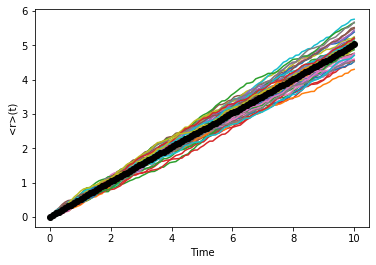

In [21]:
#  PART (a) 
#  Specify the duration of walk (consider tmin = 0) and the time-step dt
dt = 0.1  
tmax = 10  
num_timepoints = int(tmax / dt)
time = np.linspace(0, tmax, num_timepoints)

#  Initialize the position array (r)
#  for each random walk, the array r stores the position of the walker after every random step
r = np.zeros(num_timepoints)

#  Initialize the array (rave) which will hold (for each time step) the average displacement from the initial point
rave=np.zeros(num_timepoints)

#  Assign the number of random walks (Nsailor) to be done; each walk starts from the origin (0)
    # Assign value for the number of random walks to be performed '''
      #---------------------------------------------
Nsailor = 50
      #---------------------------------------------- 


#  Specify the bias
#  rbias: introduce a bias for moving to the left or to the right.
#  rbias = 0 : move only to the right (positive steps)
#  rbias = 0.5 : move half-time to the right (positive step), half-time to the left (negative step)
#  rbias = 1 : move only to the left (negative steps)
#
    # Assign the value for rbias, which properly represents the kind of random walk to be performed'''
      #---------------------------------------------
rbias = 0
      #---------------------------------------------- 

#  Generate the random walks

for i in range(Nsailor):
    for n in range(1, num_timepoints):
        
      # Fill in the code for r[i] and for the rave[n]'''
      #---------------------------------------------
        r[n] = r[n-1] + (np.random.rand()-rbias)* dt
        rave[n] = rave[n] + r[n]
      #----------------------------------------------
    
    plt.plot(time,r)

#  Take the average of all random walks    
rave=rave/float(Nsailor)

#  Plot the results
plt.plot(time,rave,'ko-',linewidth='1.5')
plt.xlabel('Time')
plt.ylabel('<r>(t)')
plt.show()

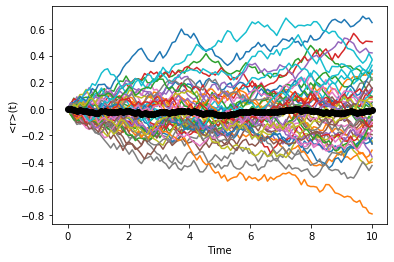

In [25]:
# PART (b)
#  Specify the duration of walk (consider tmin = 0) and the time-step dt
dt = 0.1  
tmax = 10  
num_timepoints = int(tmax / dt)
time = np.linspace(0, tmax, num_timepoints)

#  Initialize the position array (r)
#  for each random walk, the array r stores the position of the walker after every random step
r = np.zeros(num_timepoints)

#  Initialize the array (rave) which will hold (for each time step) the average displacement from the initial point
rave=np.zeros(num_timepoints)

#  Assign the number of random walks (Nsailor) to be done; each walk starts from the origin (0)
    # '''Assign value for the number of random walks to be performed '''
      #---------------------------------------------
Nsailor = 50
      #---------------------------------------------- 

#  Specify the bias
#  rbias: introduce a bias for moving to the left or to the right.
#  rbias = 0 : move only to the right (positive steps)
#  rbias = 0.5 : move half-time to the right (positive step), half-time to the left (negative step)
#  rbias = 1 : move only to the left (negative steps)

# '''Assign the value for rbias, which properly represents the kind of random walk to be performed'''
      #---------------------------------------------
rbias = 0.5
      #---------------------------------------------- 
#  Specify the number of random walks (Nsailor) to be done; each walk starts from the origin (0)


#  Generate the random walks

for i in range(Nsailor):
    for n in range(1, num_timepoints):
        
        '''Fill in the code for r[i] and for the rave[n]'''
      #---------------------------------------------
        r[n] = r[n-1] + (np.random.rand()-rbias)* dt
        rave[n] = rave[n] + r[n]
      #----------------------------------------------
    
    plt.plot(time,r)

#  Take the average of all random walks    
rave=rave/float(Nsailor)

#  Plot the results
plt.plot(time,rave,'ko-',linewidth='2')
plt.xlabel('Time')
plt.ylabel('<r>(t)')
plt.show()